In [145]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [146]:
agdq_df = pd.read_csv("adqd_df_2020_01_15.csv")
agdq_df.head()

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment,segment
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-01-12 16:19:07,3131932.78,NaN,NaN
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-01-12 16:06:30,3131927.78,NaN,NaN
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-01-12 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!,Super Metroid Impossible
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-01-12 14:14:38,3131877.78,NaN,Super Metroid Impossible
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-01-12 13:42:53,3131852.78,NaN,Super Metroid Impossible


In [147]:
agdq_df[agdq_df['amount_cleaned'] > 20000]

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment,segment
5959,Games Done Quick,/tracker/donor/348261/28,01/12/2020 04:57:11 +0000,"$356,306.00",/tracker/donation/659065,Yes,356306.0,2020-01-12 04:57:11,2876491.79,"Subs, Bits, and Sponsors.",The Legend of Zelda: A Link to the Past Random...


In [148]:
agdq_df_clean = agdq_df[agdq_df['amount_cleaned'] < 20000]
agdq_df_clean.reset_index(drop=True, inplace = True)
agdq_df_clean.head()

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment,segment
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-01-12 16:19:07,3131932.78,NaN,NaN
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-01-12 16:06:30,3131927.78,NaN,NaN
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-01-12 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!,Super Metroid Impossible
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-01-12 14:14:38,3131877.78,NaN,Super Metroid Impossible
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-01-12 13:42:53,3131852.78,NaN,Super Metroid Impossible


In [149]:
temp = agdq_df_clean.sort_values('time_received_cleaned', ascending= True)
temp['cumumlative_cleaned'] = temp['amount_cleaned'].cumsum()

In [150]:
agdq_df_clean = temp.sort_values('time_received_cleaned', ascending= False)
agdq_df_clean.head()

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment,segment,cumumlative_cleaned
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-01-12 16:19:07,3131932.78,NaN,NaN,2775676.78
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-01-12 16:06:30,3131927.78,NaN,NaN,2775671.78
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-01-12 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!,Super Metroid Impossible,2775646.78
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-01-12 14:14:38,3131877.78,NaN,Super Metroid Impossible,2775621.78
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-01-12 13:42:53,3131852.78,NaN,Super Metroid Impossible,2775596.78


In [151]:
event_df = pd.read_csv("eventBreakdownDetailsCleaned.csv")
event_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,NaN,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,123


In [152]:
real_run_length = []

for i in event_df['run_length']:
    split = i.split(":")
    hour = int(split[0].strip())
    minute = int(split[1].strip())
    seconds = int(split[2].strip())
    real_run_length.append(hour * 60 * 60 + minute * 60 + seconds)
    
event_df['real_run_length'] = real_run_length

In [153]:
real_setup_length = []

for i in event_df['setup_length']:
    split = i.split(":")
    hour = int(split[0].strip())
    minute = int(split[1].strip())
    seconds = int(split[2].strip())
    real_setup_length.append(hour * 60 * 60 + minute * 60 + seconds)
    
event_df['real_setup_length'] = real_setup_length

C:\Users\Jack\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

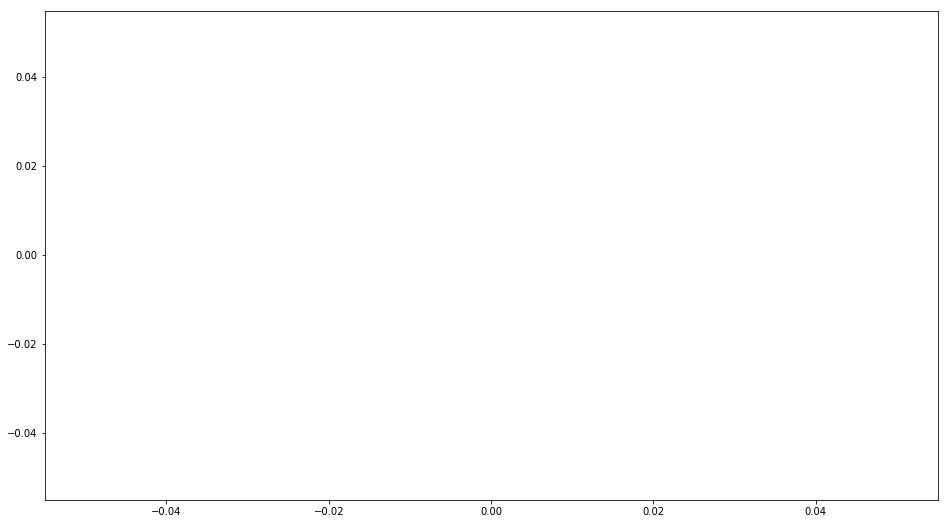

In [138]:
plt.figure(figsize = (16, 9))
sns.lineplot(pd.to_datetime(agdq_df_clean['time_received_cleaned']), 
             agdq_df_clean['cumumlative_cleaned'])
plt.xticks(rotation = 45)
plt.title("Cumulative donations over time (no GDQ)", fontsize = 15, pad = 20)
plt.xlabel("Donation time (UTC+08:00)", labelpad = 20, fontsize = 15)
plt.ylabel("Cumulative donation ($)", labelpad = 20, fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.despine()

C:\Users\Jack\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


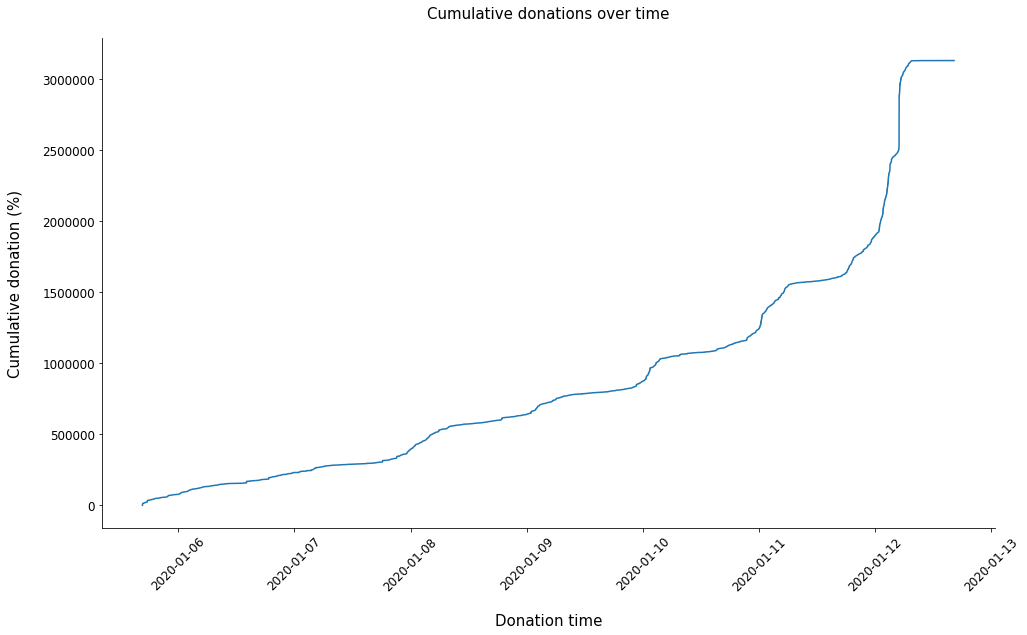

In [15]:
plt.figure(figsize = (16, 9))
sns.lineplot(pd.to_datetime(agdq_df['time_received_cleaned']), agdq_df['cumumlative'])
plt.xticks(rotation = 45)
plt.title("Cumulative donations over time", fontsize = 15, pad = 20)
plt.xlabel("Donation time", labelpad = 20, fontsize = 15)
plt.ylabel("Cumulative donation (%)", labelpad = 20, fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.despine()

In [154]:
df_groupby_segment = agdq_df_clean.groupby("segment").sum().sort_values('amount_cleaned', ascending = False)

In [155]:
df_groupby_segment.head()

,amount_cleaned,cumumlative,cumumlative_cleaned
segment,,,
The Legend of Zelda: A Link to the Past Randomizer,352484.69,2.022338e+10,1.822486e+10
Clone Hero (Guitar Hero),263248.25,1.000823e+10,1.000833e+10
Pokemon X/Y,174859.67,3.507565e+09,3.507565e+09
Katana Zero,131150.65,3.685279e+09,3.685279e+09
Blasphemous,108018.22,2.714643e+09,2.714643e+09


In [156]:
df_groupby_segment = df_groupby_segment.reset_index()
df_groupby_segment.drop(['cumumlative', 'cumumlative_cleaned'], inplace=True, axis = 1)
df_groupby_segment.columns = ['game', "total_raised"]
df_groupby_segment

,game,total_raised
0,The Legend of Zelda: A Link to the Past Random...,352484.69
1,Clone Hero (Guitar Hero),263248.25
2,Pokemon X/Y,174859.67
3,Katana Zero,131150.65
4,Blasphemous,108018.22
5,PAC-MAN Championship Edition DX+,94407.71
6,Trauma Center: New Blood,91051.38
7,Final Fantasy VIII,77855.37
8,Fatal Frame,71997.75
9,Kingdom Hearts: Birth by Sleep Final Mix HD,57098.90


In [157]:
event_df = pd.merge(event_df, df_groupby_segment, how = 'outer', on = 'game' )
event_df

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length,total_raised
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,NaN,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440,6568.65
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553,9569.38
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437,11780.35
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980,6599.92
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,3723,10659.20
5,January 6,Star Wars - Escape from Yavin 4: The Lost Maps,Any% no VRGI,5:39 AM,0:20:12,0:50:48,Geeketiquette,CovertMuffin,PC,2020-01-06 05:39:00,2020-01-06 06:50:00,4260,1212,3048,5135.08
6,January 6,The Binding Of Isaac Afterbirth+,R+7 (S6),6:50 AM,0:23:19,1:12:41,cartridgeblowers,StoneAgeMarcus,PC,2020-01-06 06:50:00,2020-01-06 08:26:00,5760,1399,4361,9283.94
7,January 6,Super Mario Bros. 3,100% race,8:26 AM,0:23:32,1:14:28,cartridgeblowers,"mitchflowerpower, TheHaxor, stewie_cartman",NES,2020-01-06 08:26:00,2020-01-06 10:04:00,5880,1412,4468,6256.02
8,January 6,The Legend of Zelda: Skyward Sword,Any%,10:04 AM,0:27:24,2:25:36,Kungfufruitcup,gymnast86,Wii,2020-01-06 10:04:00,2020-01-06 12:57:00,10380,1644,8736,2583.00
9,January 6,Dino Crisis 2,Any%,12:57 PM,0:14:52,1:20:08,CovertMuffin,WOLFDNC,PS3,2020-01-06 12:57:00,2020-01-06 14:32:00,5700,892,4808,14095.98


In [158]:
event_df['runner'] = [i.strip() for i in event_df['runner']]
event_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length,total_raised
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,NaN,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440,6568.65
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553,9569.38
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437,11780.35
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980,6599.92
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,3723,10659.20


In [159]:
event_df.columns

Index(['date', 'game', 'game_type', 'time_start', 'setup_length', 'run_length',
       'runner', 'host', 'console', 'real_time_start', 'real_time_end',
       'time_difference', 'real_setup_length', 'real_run_length',
       'total_raised'],
      dtype='object')

In [160]:
event_df.columns = ['date', 'game', 'game_type', 'time_start', 'setup_length', 'run_length',
       'host', 'runner', 'console', 'real_time_start', 'real_time_end',
       'time_difference', 'real_setup_length', 'real_run_length',
       'total_raised']

In [161]:
sorted_event_df = event_df.sort_values("total_raised", ascending = False)

sort_list = ['game', 'runner', 'console', 'total_raised']
sorted_event_df[sort_list]

,game,runner,console,total_raised
133,The Legend of Zelda: A Link to the Past Random...,"Andy, Warp World",SNES,352484.69
132,Clone Hero (Guitar Hero),FrostedGH,PC,263248.25
110,Pokemon X/Y,wartab,3DS,174859.67
131,Katana Zero,yisk,PC,131150.65
130,Blasphemous,teddyras,PC,108018.22
108,PAC-MAN Championship Edition DX+,teapartycthulu,PC,94407.71
122,Trauma Center: New Blood,Thurler,Wii,91051.38
52,Final Fantasy VIII,"Tojju, Muttski, Luzbelheim",PlayStation 2,77855.37
84,Fatal Frame,Maxylobes,PS2,71997.75
129,Kingdom Hearts: Birth by Sleep Final Mix HD,Pessilist,PS4,57098.90


In [179]:
sorted_event_df[sorted_event_df['runner'] == 'dwangoAC']

,date,game,game_type,time_start,setup_length,run_length,host,runner,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length,total_raised


In [176]:
from collections import Counter

runner_list = []
for i in sorted_event_df['runner']:
    temp = i.split(",")
    runner_list.extend(temp)
    
clean_runner_list = []
for i in runner_list:
    clean_runner_list.append(i.strip())
    
Counter(clean_runner_list).most_common(20)

[('TASBot', 4),
 ('dwangoAC', 3),
 ('TiKevin83', 3),
 ('Pessilist', 2),
 ('Lizstar', 2),
 ('Joester98', 2),
 ('ThePackle', 2),
 ('flarebear', 2),
 ('mohoc', 2),
 ('Bryonato', 2),
 ('Gelly', 2),
 ('Scrublord', 2),
 ('TGH', 2),
 ('Zaxon96', 2),
 ('darrenville', 2),
 ('becored', 2),
 ('SNeaky', 2),
 ('authorblues', 2),
 ('Winslinator', 2),
 ('Andy', 1)]

In [184]:
sorted_event_df['host'].value_counts()

Lizstar                      15
YoBGS                         9
Patty                         9
Prolix                        9
fir_                          8
KrunchyLex                    8
Sooraya                       7
Edobean                       6
Raelcun                       6
iggyzig                       6
SporadicErratic               5
CovertMuffin                  5
cartridgeblowers              5
AnEternalEnigma               5
LT_Humphrey                   4
Geeketiquette                 4
Mr. Game and Shout            4
GhostBird                     4
Cutethulhoo                   3
Skybilz                       3
SakuraTsubasa                 3
PurpleGhostKasper             3
Kungfufruitcup                2
ZoeVermilion                  2
YellowKillerBee               2
Chris From Florida            1
Doctor No                     1
Chris From Florida, YoBGS     1
SmoothOperative               1
Name: host, dtype: int64

In [166]:
event_df[event_df['runner'] == 'Geeketiquette']

,date,game,game_type,time_start,setup_length,run_length,host,runner,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length,total_raised


In [167]:
event_df['amount_per_second'] = event_df['total_raised'] / event_df['time_difference']

In [173]:
event_df['in-game_amount_per_second'] = event_df['total_raised'] / event_df['real_run_length']

event_df.sort_values("real_run_length", ascending = False)

,date,game,game_type,time_start,setup_length,run_length,host,runner,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length,total_raised,amount_per_second,in-game_amount_per_second
52,January 8,Final Fantasy VIII,any% Co-op Relay,3:45 PM,0:10:42,9:10:18,"Chris From Florida, YoBGS","Tojju, Muttski, Luzbelheim",PlayStation 2,2020-01-08 15:45:00,2020-01-09 01:06:00,33660,642,33018,77855.37,2.312994,2.357967
110,January 11,Pokemon X/Y,Any%,1:06 AM,0:19:59,4:04:01,Geeketiquette,wartab,3DS,2020-01-11 01:06:00,2020-01-11 05:30:00,15840,1199,14641,174859.67,11.039121,11.943151
34,January 7,Grand Theft Auto: San Andreas,Any% (No AJS),5:39 PM,0:32:56,4:02:04,AnEternalEnigma,Reset,PC,2020-01-07 17:39:00,2020-01-07 22:14:00,16500,1976,14524,51230.33,3.104868,3.527288
133,January 12,The Legend of Zelda: A Link to the Past Random...,"Open Mode, Crowd Control Difficulty",3:11 AM,0:17:00,3:41:00,fir_,"Andy, Warp World",SNES,2020-01-12 03:11:00,2020-01-12 07:09:00,14280,1020,13260,352484.69,24.683802,26.582556
51,January 8,The Legend of Zelda series,Zelda Relay,11:56 AM,0:27:48,3:21:12,GhostBird,"Pro_JN, BluntBunny, Cantaloupeme, TGH, Rezovay...",NES/SNES,2020-01-08 11:56:00,2020-01-08 15:45:00,13740,1668,12072,12703.33,0.924551,1.052297
122,January 11,Trauma Center: New Blood,All Operations XS Rank,3:41 PM,0:13:34,2:59:26,GhostBird,Thurler,Wii,2020-01-11 15:41:00,2020-01-11 18:54:00,11580,814,10766,91051.38,7.862813,8.457308
66,January 9,The Legend of Zelda: Ocarina of Time,100% No Source Requirement,9:52 AM,0:42:48,2:50:12,Kungfufruitcup,ZFG,Wii,2020-01-09 09:52:00,2020-01-09 13:25:00,12780,2568,10212,10578.25,0.827719,1.035865
32,January 7,DOOM (2016),100% Nightmare,12:11 PM,0:36:09,2:40:51,CovertMuffin,ByteMe,PC,2020-01-07 12:11:00,2020-01-07 15:28:00,11820,2169,9651,6129.15,0.518541,0.635079
17,January 6,Mario & Luigi: Superstar Saga,All Bosses Co-op,6:22 PM,0:19:28,2:38:32,LT_Humphrey,"Sjorec, murmilio",GBA,2020-01-06 18:22:00,2020-01-06 21:20:00,10680,1168,9512,30482.14,2.854133,3.204598
8,January 6,The Legend of Zelda: Skyward Sword,Any%,10:04 AM,0:27:24,2:25:36,Kungfufruitcup,gymnast86,Wii,2020-01-06 10:04:00,2020-01-06 12:57:00,10380,1644,8736,2583.00,0.248844,0.295673


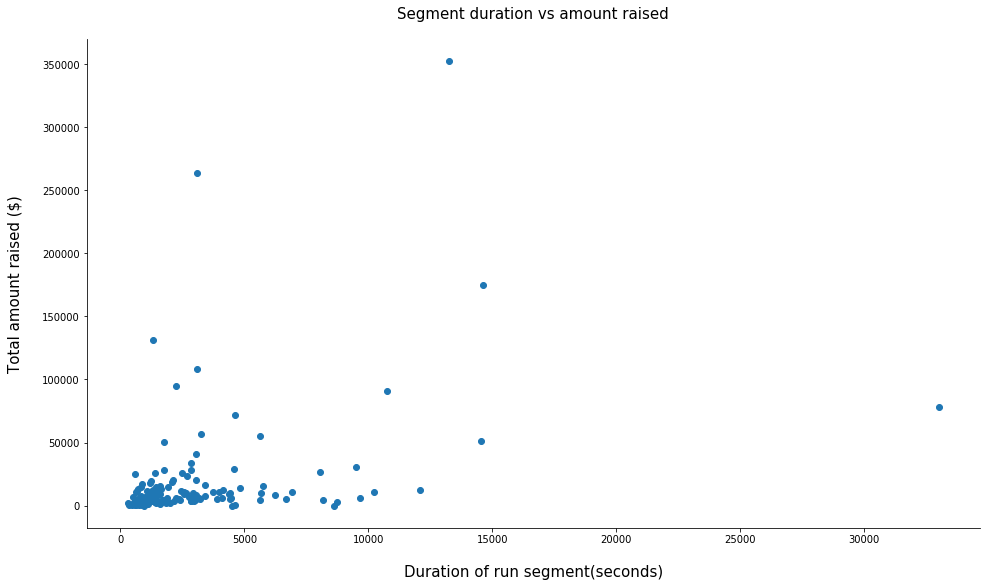

In [122]:
plt.figure(figsize = (16, 9))
plt.scatter(event_df['real_run_length'], event_df['total_raised'])


plt.title("Segment duration vs amount raised", fontsize = 15, pad = 20)
plt.xlabel("Duration of run segment(seconds)", labelpad = 20, fontsize = 15)
plt.ylabel("Total amount raised ($)", labelpad = 20, fontsize = 15)
sns.despine()

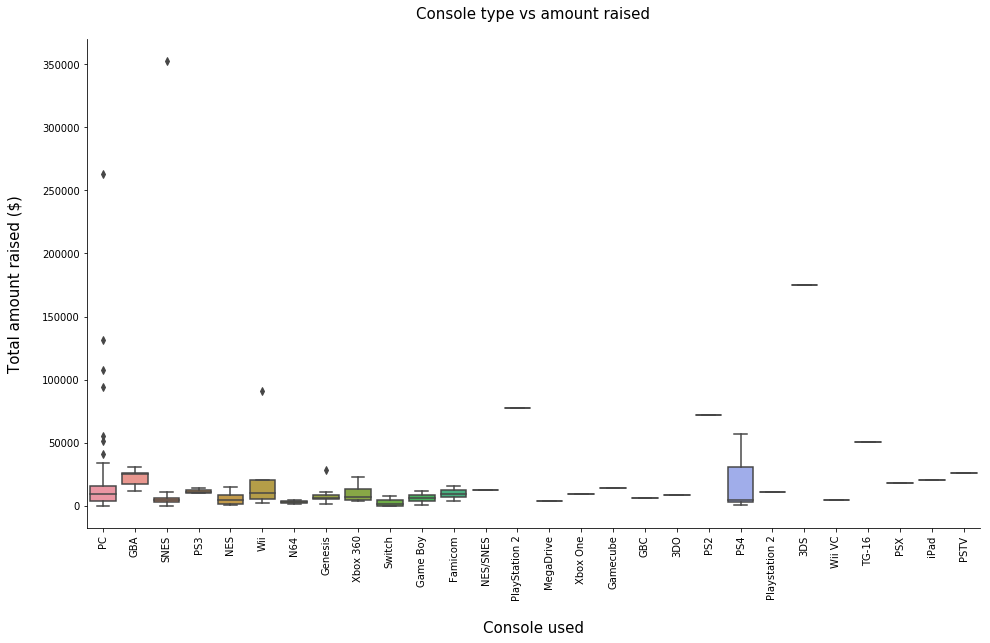

In [127]:
plt.figure(figsize = (16,9))
sns.boxplot(event_df['console'], event_df['total_raised'])
plt.xticks(rotation = 90)
plt.title("Console type vs amount raised", fontsize = 15, pad = 20)
plt.xlabel("Console used", labelpad = 20, fontsize = 15)
plt.ylabel("Total amount raised ($)", labelpad = 20, fontsize = 15)
sns.despine()

(array([112.,  19.,   2.,   1.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([1.15982371e-02, 9.98387187e+00, 1.99561455e+01, 2.99284191e+01,
        3.99006928e+01, 4.98729664e+01, 5.98452401e+01, 6.98175137e+01,
        7.97897873e+01, 8.97620610e+01, 9.97343346e+01]),
 <a list of 10 Patch objects>)

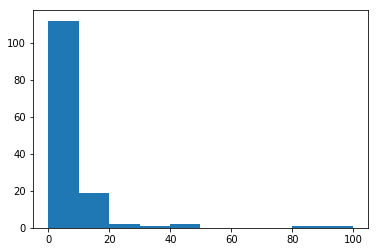

In [100]:
plt.hist(event_df.dropna()['in-game_amount_per_second'])

(array([108.,  20.,   4.,   1.,   2.,   1.,   0.,   0.,   1.,   1.]),
 array([1.13378685e-02, 6.02043810e+00, 1.20295383e+01, 1.80386386e+01,
        2.40477388e+01, 3.00568390e+01, 3.60659393e+01, 4.20750395e+01,
        4.80841397e+01, 5.40932400e+01, 6.01023402e+01]),
 <a list of 10 Patch objects>)

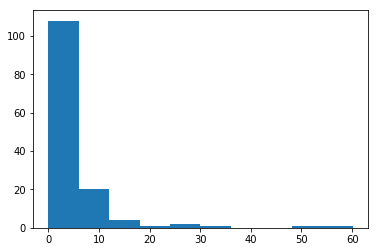

In [101]:
plt.hist(event_df.dropna()['amount_per_second'])

In [169]:
runner_metrics = event_df.groupby('runner').sum()
runner_metrics.sort_values("total_raised", ascending = False)

,time_difference,real_setup_length,real_run_length,total_raised,amount_per_second,in-game_amount_per_second
runner,,,,,,
"Andy, Warp World",14280,1020,13260,352484.69,24.683802,26.582556
FrostedGH,4380,1288,3092,263248.25,60.102340,85.138503
wartab,15840,1199,14641,174859.67,11.039121,11.943151
yisk,2700,1385,1315,131150.65,48.574315,99.734335
teddyras,3960,862,3098,108018.22,27.277328,34.867082
teapartycthulu,3120,882,2238,94407.71,30.258881,42.183963
Thurler,11580,814,10766,91051.38,7.862813,8.457308
"Tojju, Muttski, Luzbelheim",33660,642,33018,77855.37,2.312994,2.357967
Maxylobes,5400,791,4609,71997.75,13.332917,15.621122


In [170]:
games_run = []

for i in runner_metrics.index:
    games_run.append(len(event_df[event_df['runner'] == i]))
    
runner_metrics['num_games'] = games_run
runner_metrics['average_amount_per_game'] = runner_metrics['total_raised'] / runner_metrics['num_games']
runner_metrics.sort_values("real_run_length", ascending = False)

,time_difference,real_setup_length,real_run_length,total_raised,amount_per_second,in-game_amount_per_second,num_games,average_amount_per_game
runner,,,,,,,,
"Tojju, Muttski, Luzbelheim",33660,642,33018,77855.37,2.312994,2.357967,1,77855.370
wartab,15840,1199,14641,174859.67,11.039121,11.943151,1,174859.670
Reset,16500,1976,14524,51230.33,3.104868,3.527288,1,51230.330
"Andy, Warp World",14280,1020,13260,352484.69,24.683802,26.582556,1,352484.690
"Pro_JN, BluntBunny, Cantaloupeme, TGH, Rezovayix, rcdrone, JoshRTA, Greenmario, justinman114",13740,1668,12072,12703.33,0.924551,1.052297,1,12703.330
Thurler,11580,814,10766,91051.38,7.862813,8.457308,1,91051.380
ZFG,12780,2568,10212,10578.25,0.827719,1.035865,1,10578.250
ByteMe,11820,2169,9651,6129.15,0.518541,0.635079,1,6129.150
"Sjorec, murmilio",10680,1168,9512,30482.14,2.854133,3.204598,1,30482.140


In [110]:
139/28

4.964285714285714

In [171]:
runner_metrics.sort_values("real_run_length", ascending = False)['real_run_length'] / 60

runner
Tojju, Muttski, Luzbelheim                                                                           550.300000
wartab                                                                                               244.016667
Reset                                                                                                242.066667
Andy, Warp World                                                                                     221.000000
Pro_JN, BluntBunny, Cantaloupeme, TGH, Rezovayix, rcdrone, JoshRTA, Greenmario, justinman114         201.200000
Thurler                                                                                              179.433333
ZFG                                                                                                  170.200000
ByteMe                                                                                               160.850000
Sjorec, murmilio                                                                                 

In [20]:
len(event_df)

141

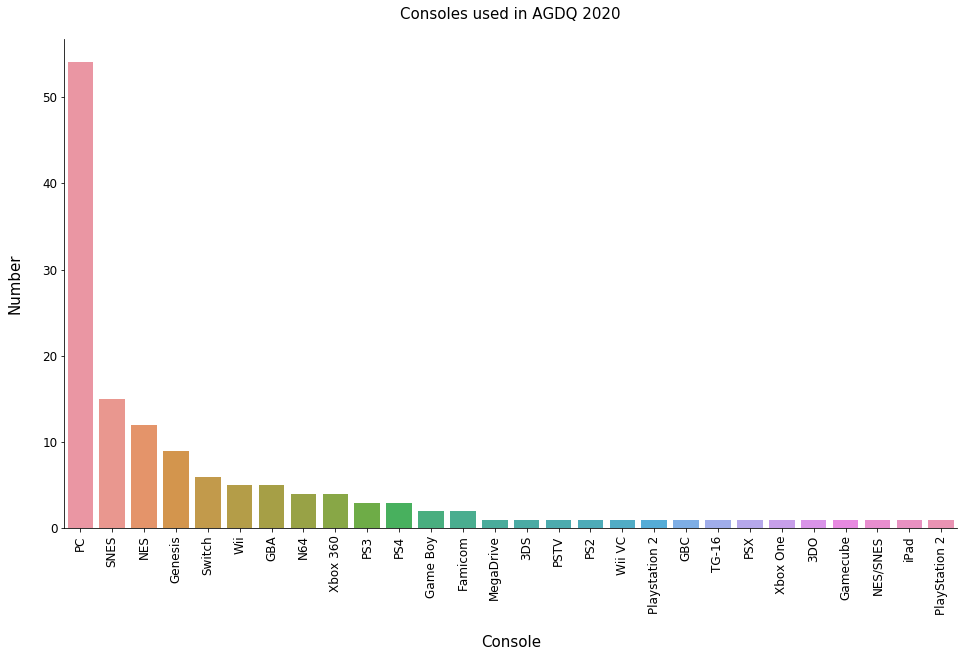

In [21]:
plt.figure(figsize = (16, 9))
sns.barplot(event_df['console'].value_counts().index, event_df['console'].value_counts())

plt.title("Consoles used in AGDQ 2020", fontsize = 15, pad = 20)
plt.xlabel("Console", labelpad = 20, fontsize = 15)
plt.ylabel("Number", labelpad = 20, fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
sns.despine()

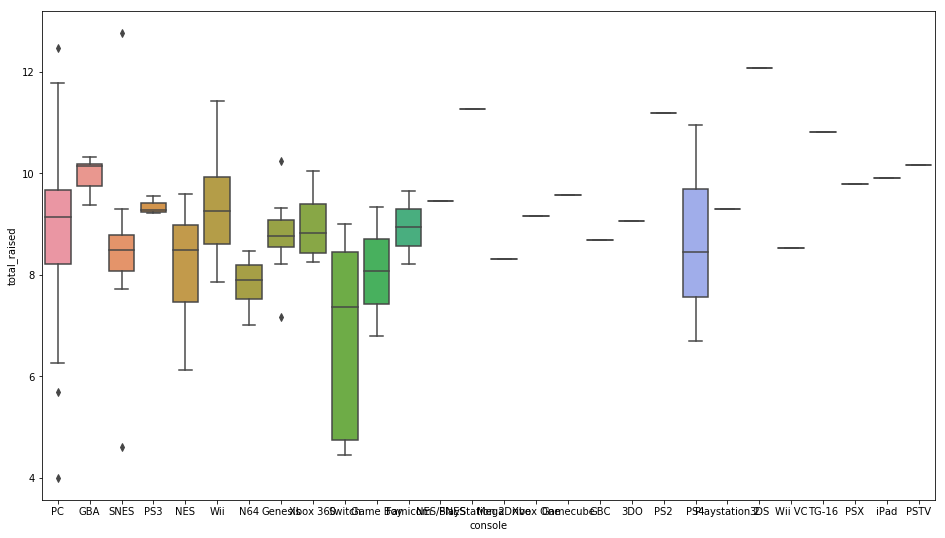

In [66]:
plt.figure(figsize = (16, 9))
sns.boxplot(event_df['console'], np.log(event_df['total_raised']))

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

In [181]:
agdq_df_clean.isnull().sum()

name                         0
name_url                   346
time_received                0
amount                       0
amount_url                   0
has_comment                  0
amount_cleaned               0
time_received_cleaned        0
cumumlative                  0
comment                  17528
segment                   2039
cumumlative_cleaned          0
dtype: int64

In [182]:
len(agdq_df_clean) - 17528

36573

In [24]:
text_list = []

for comment in agdq_df_clean['comment'].dropna():
    split = comment.split(" ")
    for i in split:
        text = i.translate(str.maketrans('', '', string.punctuation))
        text_list.append(text.lower().strip())

text_list[:20]

['thanks',
 'for',
 'all',
 'the',
 'great',
 'content',
 'go',
 'beat',
 'cancer',
 'n1',
 'last',
 'one',
 'aw',
 'noo',
 'i',
 'missed',
 'the',
 'end',
 'of',
 'agdq']

In [25]:
text = " ".join(comment.lower().strip() for comment in agdq_df_clean['comment'].dropna())
print ("There are {} words in the combination of all commbents.".format(len(text_list)))

There are 681146 words in the combination of all commbents.


In [26]:
len(set(text_list))

28115

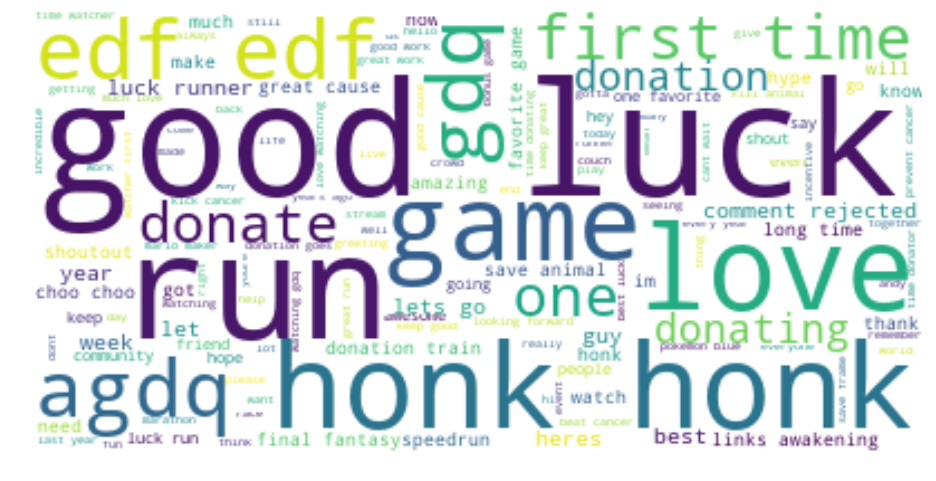

In [27]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(" ".join(text_list))
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
terms = ['mother', 'father', 'brother', 'sister', 'uncle', 'aunt', 'cousin',
         'friend', 'grandfather', 'grand-father', 'grandmother', 'grand-mother',
         'niece', 'nephew', 'grandson', 'granddaughter', 'grand-son', 'grand-daughter']

terms_dict = {i: 0 for i in terms}
terms_dict

{'mother': 0,
 'father': 0,
 'brother': 0,
 'sister': 0,
 'uncle': 0,
 'aunt': 0,
 'cousin': 0,
 'friend': 0,
 'grandfather': 0,
 'grand-father': 0,
 'grandmother': 0,
 'grand-mother': 0,
 'niece': 0,
 'nephew': 0,
 'grandson': 0,
 'granddaughter': 0,
 'grand-son': 0,
 'grand-daughter': 0}

In [31]:
len(text_list)

681146

In [40]:
for text_ in text_list:
    if text_ in terms:
        terms_dict[text_] += 1
        
terms_dict

{'mother': 241,
 'father': 162,
 'brother': 163,
 'sister': 80,
 'uncle': 119,
 'aunt': 139,
 'cousin': 45,
 'friend': 472,
 'grandfather': 111,
 'grand-father': 0,
 'grandmother': 149,
 'grand-mother': 0,
 'niece': 4,
 'nephew': 13,
 'grandson': 4,
 'granddaughter': 0,
 'grand-son': 0,
 'grand-daughter': 0}

In [43]:
sum(terms_dict.values())

1702

In [46]:
from collections import Counter
terms_dict = Counter(terms_dict)

terms_dict.most_common(len(terms_dict))

[('friend', 472),
 ('mother', 241),
 ('brother', 163),
 ('father', 162),
 ('grandmother', 149),
 ('aunt', 139),
 ('uncle', 119),
 ('grandfather', 111),
 ('sister', 80),
 ('cousin', 45),
 ('nephew', 13),
 ('niece', 4),
 ('grandson', 4),
 ('grand-father', 0),
 ('grand-mother', 0),
 ('granddaughter', 0),
 ('grand-son', 0),
 ('grand-daughter', 0)]